In [58]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.001, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.theta_0 = 0      # التقاطع (Bias/Intercept)
        self.theta = None     # الأوزان (Weights/Slopes) تدعم ميزة واحدة أو أكثر
        self.sse_history = [] # لحفظ خطأ مجموع المربعات في كل تكرار
        
    def fit(self, X, y):
        # تعديل الكلاس لدعم ميزات متعددة (Multiple Features) 
        # عبر التأكد من أن X عبارة عن مصفوفة ثنائية الأبعاد
        if X.ndim == 1:
            X = X.reshape(-1, 1)
            
        n_samples, n_features = X.shape
        
        # تهيئة الأوزان بناءً على عدد الميزات
        self.theta = np.zeros(n_features)
        self.theta_0 = 0
        self.sse_history = []
        
        for _ in range(self.n_iters):
            # التنبؤ بالقيم الحالية
            y_pred = self.predict(X)
            
            # حساب الخطأ
            error = y_pred - y
            
            # تحديث المعاملات باستخدام الاشتقاق (Gradient)
            # نستخدم المتوسط (1/n) لضمان استقرار الخوارزمية
            self.theta_0 -= self.learning_rate * (1 / n_samples) * np.sum(error)
            self.theta -= self.learning_rate * (1 / n_samples) * np.dot(X.T, error)
            
            # حساب وحفظ SSE للتصور البصري
            sse = np.sum(error ** 2)
            self.sse_history.append(sse)
            
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        # المعادلة: y = theta_0 + (X * theta)
        return self.theta_0 + np.dot(X, self.theta)
    
    # 1. إضافة دالة لحساب متوسط مربع الخطأ (MSE)
    def calculate_mse(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        return mse

    def plot_training(self, X, y):
        # رسم SSE عبر التكرارات
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(range(1, self.n_iters + 1), self.sse_history, color='blue')
        plt.title('SSE over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Sum of Squared Errors (SSE)')
        
        # رسم خط الانحدار (فقط إذا كانت البيانات تحتوي على ميزة واحدة)
        if X.ndim == 1 or X.shape[1] == 1:
            plt.subplot(1, 2, 2)
            plt.scatter(X, y, color='red', label='Data points')
            plt.plot(X, self.predict(X), color='green', label='Regression Line')
            plt.title('Linear Regression Fit')
            plt.xlabel('Feature (X)')
            plt.ylabel('Target (y)')
            plt.legend()
            
        plt.tight_layout()
        plt.show()

# دالة مساعدة لعملية التوحيد القياسي (Normalization)
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

In [42]:
# X : Features
# Y : Targets

In [43]:
X = np.array([50,60,70,80,90])
Y = np.array([150,180,210,240,270])

In [44]:
model = LinearRegressionGD(learning_rate = 0.001 , n_iters = 100)

In [45]:
model.fit(X , Y)

In [46]:
print(f"The intercept = {model.theta_0}")
print(f"The slope = {model.theta}")

The intercept = -8.00078057397832e+59
The slope = [-5.82909532e+61]


In [47]:
# theta_0 represent intersept or bias(b)
# theta_1 represent slope or weight(w)
# wX + b

In [48]:
predicted_price = model.predict(np.array([70]))
print(f"The predicted price for 70 m^2 = {predicted_price}")

The predicted price for 70 m^2 = [-4.0811668e+63]


In [49]:
# yes , because there is no outliers

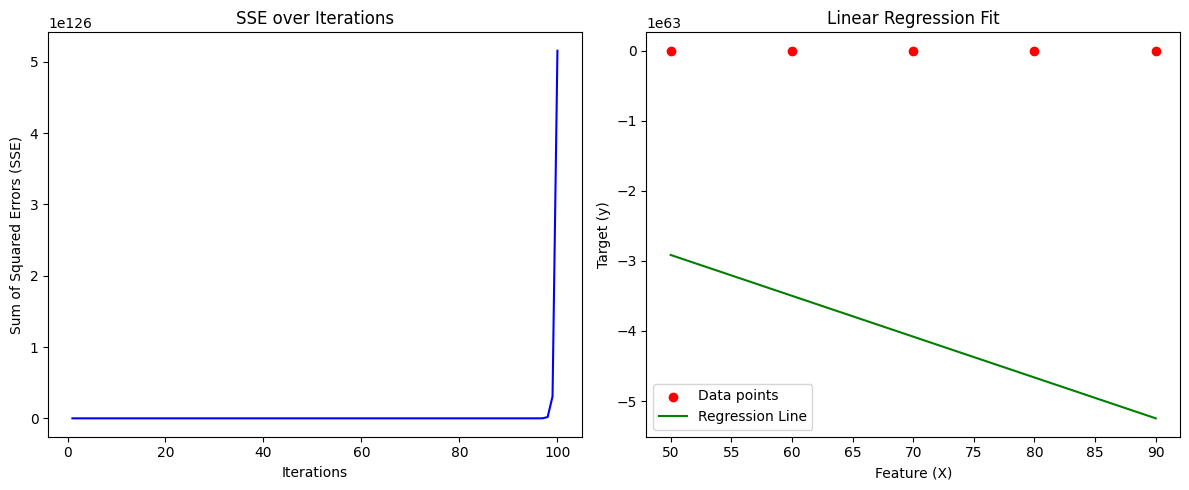

In [50]:
model.plot_training(X , Y)

In [51]:
model_2 = LinearRegressionGD(learning_rate = 0.00001 , n_iters = 100)
model_2.fit(X , Y)
print(f"The intercept = {model_2.theta_0}")
print(f"The slope = {model_2.theta}")

The intercept = 0.040948261689052
The slope = [2.98346804]


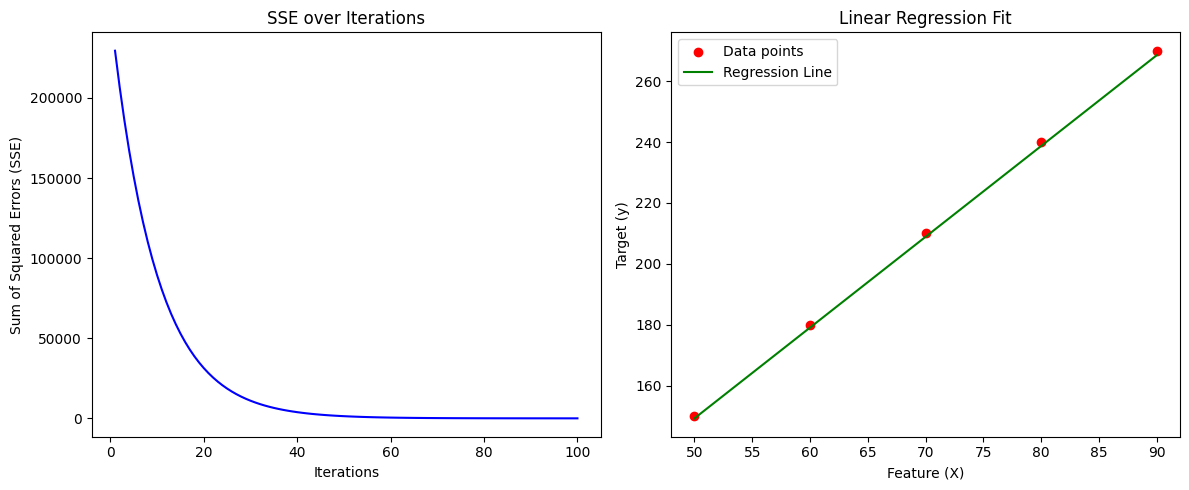

In [52]:
model_2.plot_training(X , Y)

In [53]:
model_3 = LinearRegressionGD(learning_rate = 1.0 , n_iters = 100)
model_3.fit(X , Y)
print(f"The intercept = {model_3.theta_0}")
print(f"The slope = {model_3.theta}")

The intercept = nan
The slope = [nan]


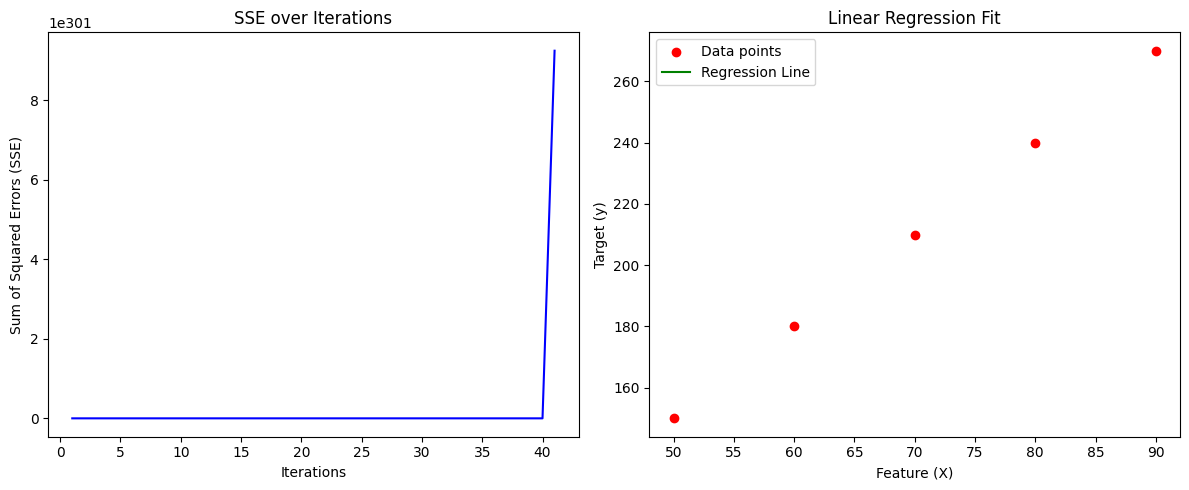

In [54]:
model_3.plot_training(X , Y)

In [59]:

# 1. التدريب بدون Normalization
model_unnorm = LinearRegressionGD(learning_rate=0.0001, n_iters=100)
model_unnorm.fit(X, Y)
mse_unnorm = model_unnorm.calculate_mse(X, Y)

# 2. التدريب مع Normalization
X_normalized = normalize_features(X)
# لاحظ أننا يمكننا استخدام معدل تعلم أكبر بكثير بأمان الآن
model_norm = LinearRegressionGD(learning_rate=0.1, n_iters=100)
model_norm.fit(X_normalized, Y)
mse_norm = model_norm.calculate_mse(X_normalized, Y)

print(f"MSE without Normalization: {mse_unnorm:.2f}")
print(f"MSE with Normalization: {mse_norm:.2f}")

MSE without Normalization: 0.00
MSE with Normalization: 0.00
